In [1]:
from show import show_images
from objectDetector import ObjectDetector
from textDetector import TextDetector
from textReader import TextReader
from textDetector import change_to_black_text

from PIL import Image, ImageOps
import unicodedata
import numpy as np
import torch
import time

c:\Users\jjkha\anaconda3\envs\ocr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

In [3]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

In [4]:
od = ObjectDetector()
td = TextDetector()
tr = TextReader()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


In [5]:
def get_title(cropped_img):
    tb_list, rt_tb_list = td.crop_all(cropped_img)

    # 원본 이미지
    text_box_list, td_prob_list, _etc_box, _etc_probs = tb_list
    title_text_list, tr_prob_list = tr.get_title(text_box_list)
    title_text = " ".join(title_text_list)
    original_set = [title_text, np.mean(td_prob_list), np.mean(tr_prob_list)]

    # 회전한 이미지
    rt_text_box_list, rt_td_prob_list, _rt_etc_box, _rt_etc_probs = rt_tb_list
    rt_title_text_list, rt_tr_prob_list = tr.get_title(rt_text_box_list)
    rt_title_text = " ".join(rt_title_text_list)
    rotated_set = [rt_title_text, np.mean(rt_td_prob_list), np.mean(rt_tr_prob_list)]

    # 결과 확인
    res = sorted([original_set, rotated_set], key=lambda x: (x[2], x[1]), reverse=True)
    print(res)
    return res[0][0]

In [6]:
image_path = r"D:\python_project\chaekchecklab\data\image\KakaoTalk_20240924_120837791.jpg"

In [7]:
cropped_img_list = od.get_object_images(image_path)
len(cropped_img_list)


image 1/1 D:\python_project\chaekchecklab\data\image\KakaoTalk_20240924_120837791.jpg: 640x480 20 books, 189.3ms
Speed: 15.6ms preprocess, 189.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


20

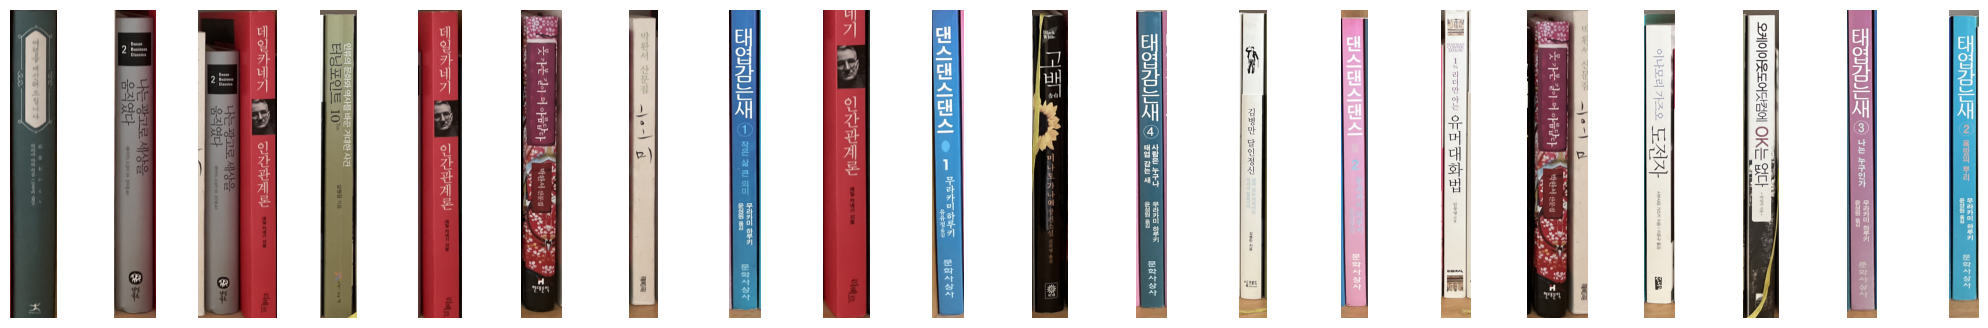

In [8]:
show_images(cropped_img_list)

In [9]:
results = []
title_list = []

for i, img in enumerate(cropped_img_list):
    print(i)
    st_time = time.time()

    # 텍스트 영역 탐지
    tb_list, rt_tb_list = td.crop_all(img)
    # 시간 측정
    td_time = time.time()
    print(f"Text Detect: {td_time-st_time}")

    # 원본 이미지
    text_box_list, td_prob_list, _etc_box, _etc_probs = tb_list
    title_text_list, tr_prob_list = tr.get_title(text_box_list)
    title_text = " ".join(title_text_list)
    original_set = [title_text, np.mean(td_prob_list), np.mean(tr_prob_list)]
    # 시간 측정
    tr_time = time.time()
    print(f"Text Read: {tr_time-td_time}, {len(text_box_list)}")

    # 회전한 이미지
    rt_text_box_list, rt_td_prob_list, _rt_etc_box, _rt_etc_probs = rt_tb_list
    rt_title_text_list, rt_tr_prob_list = tr.get_title(rt_text_box_list)
    rt_title_text = " ".join(rt_title_text_list)
    rotated_set = [rt_title_text, np.mean(rt_td_prob_list), np.mean(rt_tr_prob_list)]
    # 시간 측정
    rt_time = time.time()
    print(f"Rotation Read: {rt_time-tr_time}, {len(rt_text_box_list)}")

    # 결과 확인
    res = sorted([original_set, rotated_set], key=lambda x: (x[2], x[1]), reverse=True)
    # 시간 측정
    res_time = time.time()
    print(f"Choice Read: {res_time-rt_time}")

    print(res)
    results.append(res)
    title_list.append(res[0][0])
    print()

0
Text Detect: 7.098366022109985
Text Read: 2.3201186656951904, 1
Rotation Read: 2.936302900314331, 1
Choice Read: 0.0
[['경협', np.float64(0.00596590675018055), np.float64(0.5404578447341919)], ['5형곡종일과', np.float64(0.04870098707871795), np.float64(0.48984184861183167)]]

1
Text Detect: 7.802600622177124
Text Read: 5.141957998275757, 2
Rotation Read: 6.012182712554932, 2
Choice Read: 0.0
[['나는광고로세상을 움직였다', np.float64(0.4040295205438308), np.float64(0.9995907247066498)], ['머인보용 구별법종유', np.float64(0.16706735557541208), np.float64(0.5766185224056244)]]

2
Text Detect: 17.635069131851196
Text Read: 2.6093368530273438, 1
Rotation Read: 10.939495086669922, 4
Choice Read: 0.00019741058349609375
[['등해십조 현경합듯매 나는광고로세상을 움직였다', np.float64(0.2973590426012863), np.float64(0.7563617378473282)], ['건림', np.float64(0.5819476499294893), np.float64(0.42542433738708496)]]

3
Text Detect: 8.73138952255249
Text Read: 5.642634868621826, 2
Rotation Read: 3.8575310707092285, 1
Choice Read: 0.0
[['터닝포인트 10', np.

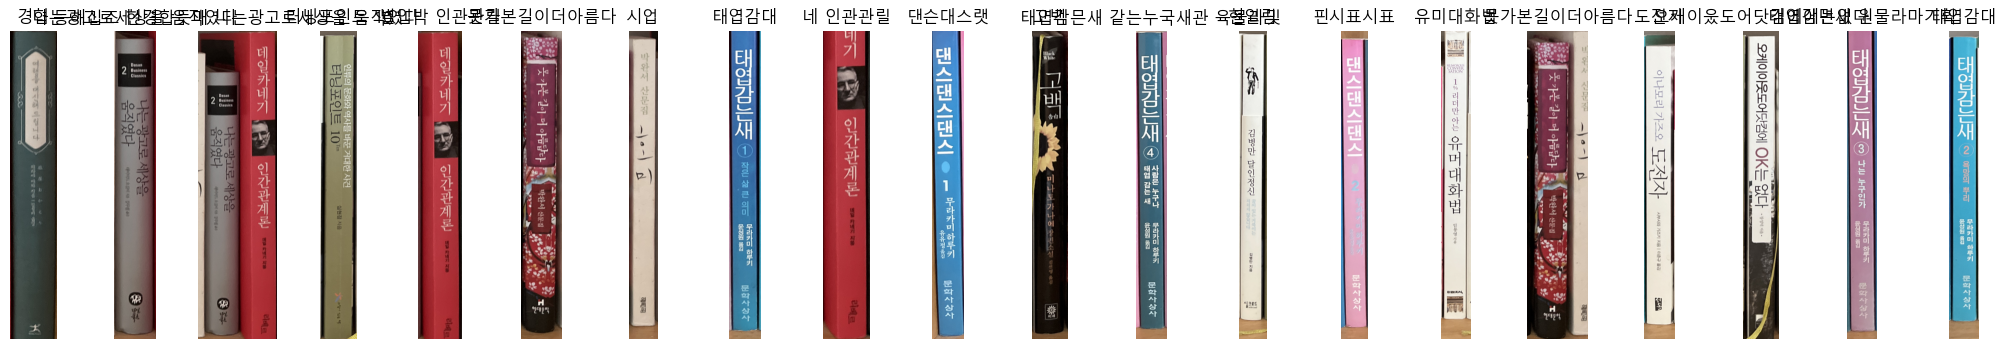

In [10]:
show_images(cropped_img_list, title_list)

In [11]:
# with ThreadPoolExecutor() as executor:
#     results = list(tqdm(executor.map(get_title, cropped_img_list), total=len(cropped_img_list)))

# with ThreadPoolExecutor() as executor:
#     results = list(executor.map(get_title, cropped_img_list))

In [12]:
# results = []
# title_list = []
# for img in cropped_img_list:
#     tb_list, rt_tb_list = td.crop_all(img)

#     # 원본 이미지
#     text_box_list, td_prob_list, _etc_box, _etc_probs = tb_list
#     title_text_list, tr_prob_list = tr.get_title(text_box_list)
#     title_text = " ".join(title_text_list)
#     original_set = [title_text, np.mean(td_prob_list), np.mean(tr_prob_list)]

#     # 회전한 이미지
#     rt_text_box_list, rt_td_prob_list, _rt_etc_box, _rt_etc_probs = rt_tb_list
#     rt_title_text_list, rt_tr_prob_list = tr.get_title(rt_text_box_list)
#     rt_title_text = " ".join(rt_title_text_list)
#     rotated_set = [rt_title_text, np.mean(rt_td_prob_list), np.mean(rt_tr_prob_list)]

#     # 결과 확인
#     res = sorted([original_set, rotated_set], key=lambda x: (x[2], x[1]), reverse=True)
#     print(res)
#     results.append(res)
#     title_list.append(res[0][0])

In [34]:
tb_list, rt_tb_list = td.crop_all(cropped_img_list[-4])

In [39]:
text_box_list, prob_list = td.crop(cropped_img_list[-4])

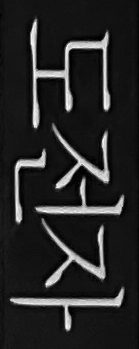

In [44]:
tb_list[0][0]
# ImageOps.invert(tb_list[0][0])

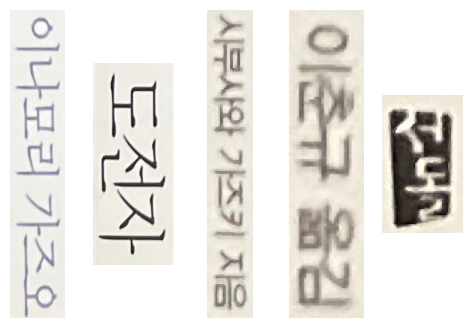

In [40]:
show_images(text_box_list)

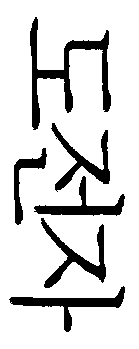

In [56]:
text_box = text_box_list[1].convert("L")

np_img = np.array(text_box)
np_img_1d = np_img.flatten()

histogram = np.bincount(np_img_1d, minlength=256)  # 0~255의 값에 대한 빈도 계산
threshold = np_img.size/256

filtered_arr = np.where(histogram < threshold, 0, histogram)
filter_img = np_img_1d[filtered_arr[np_img_1d] > 0]

# 이미지 밝기 값들의 평균과 표준편차 계산
mean_brightness = np.mean(filter_img)
std_brightness = np.std(filter_img)

# 표준정규화 (Z-score normalization)
normalized_img = (filter_img - mean_brightness) / std_brightness

normalized_mean = 255 * (np.mean(normalized_img) - normalized_img.min()) / (normalized_img.max() - normalized_img.min())

# 이진화
v = 72*(normalized_img.max() - normalized_img.min())/255 + normalized_img.min()
th = v * std_brightness + mean_brightness
th = np.mean(np_img)
binary_img = text_box.point(lambda x: 0 if x < th else 255, '1')

binary_img

In [57]:
normalized_mean

np.float64(90.09014712438699)

In [ ]:
for i, n in enumerate(histogram):
    print(i, n, "{:6f}".format(n/np_img.size))

In [35]:
np_img = np.array(tb_list[0][0])
mean_brightness = np.mean(np_img)
mean_brightness

np.float64(38.19531652614871)

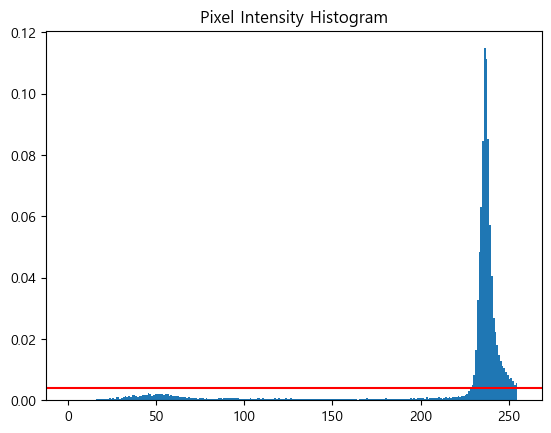

In [58]:
# 이미지의 히스토그램 표시
plt.hist(np_img.flatten(), bins=256, range=(0, 256), density=True)
plt.axhline(y=0.004, color='red', linestyle='-')
plt.title('Pixel Intensity Histogram')
plt.show()

In [69]:
import re

In [81]:
# find threshold
h = histogram/np_img.size

th = np.mean([np.max(h), np.min(h)])
th
print(th)

while True:
    filtered_line = "".join(map(str, np.where(h < th, 0, 1)))
    x = re.sub('1+', '1', filtered_line)

    cnt = sum(map(int, x))
    print(cnt)

    if cnt < 2:
        pass
    break

0.0573787388427367
1


In [47]:
threshold = 0.004 * np_img.size
threshold

194.044

In [48]:
filtered_array = histogram[histogram >= threshold]

In [49]:
# 필터링 후 평균 & 표준편차
total_count = np.sum(filtered_array)  # 총 빈도수

values = np.arange(len(filtered_array))
mean = np.average(values, weights=filtered_array)

variance = np.average((values - mean)**2, weights=filtered_array)
std_dev = np.sqrt(variance)

# 중위값 계산
# 누적 빈도 계산
cumulative_frequencies = np.cumsum(filtered_array)

# 중위값 찾기
median = np.searchsorted(cumulative_frequencies, total_count / 2)  # 중위값의 인덱스
median_value = np.arange(len(filtered_array))[median]  # 중위값

mean, median_value

(np.float64(8.832367365135978), np.int64(8))

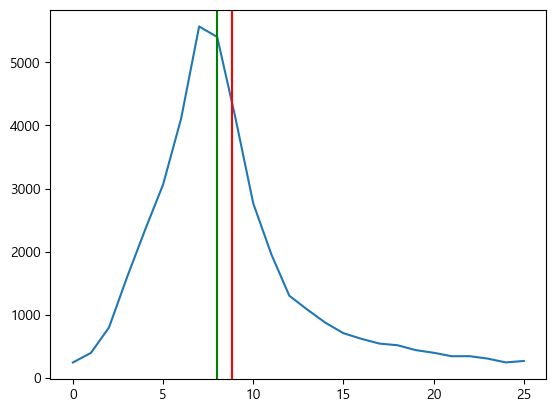

In [50]:
plt.plot(filtered_array)
plt.axvline(x=mean, color='red', linestyle='-', label='mean')
plt.axvline(x=median, color='green', linestyle='-', label='median')
plt.show()

In [51]:
filtered_arr = np.where(histogram < threshold, 0, histogram)
filtered_arr

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 

In [52]:
filtered_img = np.where(filtered_arr[np_img] == 0, 0, np_img)

In [53]:
np_img_1d = np_img.flatten()
filter_img = np_img_1d[filtered_arr[np_img_1d] > 0]

In [54]:
len(filter_img), len(np_img_1d)

(40374, 48511)

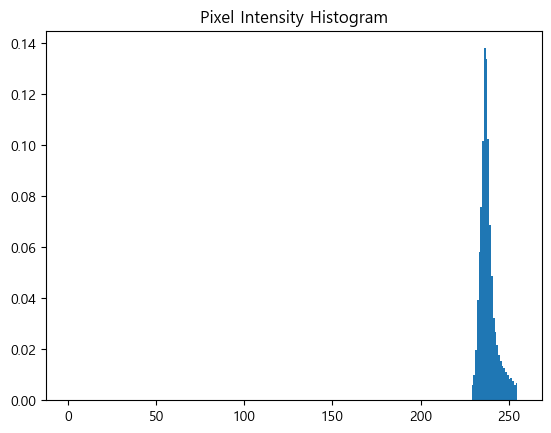

In [55]:
# 이미지의 히스토그램 표시
plt.hist(filter_img, bins=256, range=(0, 256), density=True)
plt.title('Pixel Intensity Histogram')
plt.show()

In [59]:
# 이미지 밝기 값들의 평균과 표준편차 계산
mean_brightness = np.mean(filter_img)
std_brightness = np.std(filter_img)

# 표준정규화 (Z-score normalization)
normalized_img = (filter_img - mean_brightness) / std_brightness

# 정규화된 결과를 다시 이미지로 변환 (시각화를 위해 값 조정)
normalized_img_scaled = 255 * (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min())
normalized_img_scaled = normalized_img_scaled.astype(np.uint8)

# PIL 이미지로 변환 후 저장
normalized_image = Image.fromarray(normalized_img_scaled)

In [60]:
np.mean(normalized_img_scaled)

np.float64(89.67699509585377)

In [61]:
normalized_mean = 255 * (np.mean(normalized_img) - normalized_img.min()) / (normalized_img.max() - normalized_img.min())
normalized_mean.astype(np.uint8)

np.uint8(90)

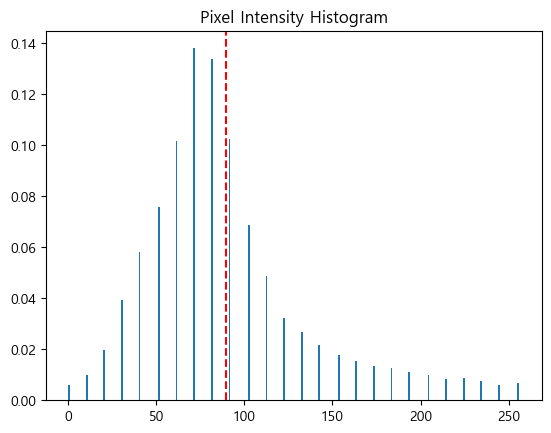

In [62]:
# 이미지의 히스토그램 표시
plt.hist(normalized_img_scaled, bins=256, range=(0, 256), density=True)
plt.axvline(x=np.mean(normalized_img_scaled), color='red', linestyle='--')
plt.title('Pixel Intensity Histogram')
plt.show()

In [206]:
v = 72*(normalized_img.max() - normalized_img.min())/255 + normalized_img.min()

th = v * std_brightness + mean_brightness
th

np.float64(169.6)

In [32]:
th = np.mean(np_img)
th

np.float64(55.50642577999872)

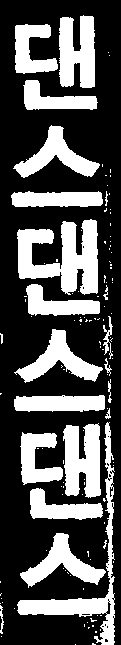

In [33]:
binary_img = tb_list[0][0].convert('L').point(lambda x: 0 if x < th else 255, '1')

ImageOps.invert(binary_img)

In [ ]:
np_img 

In [30]:
temp = td.crop(cropped_img_list[19])

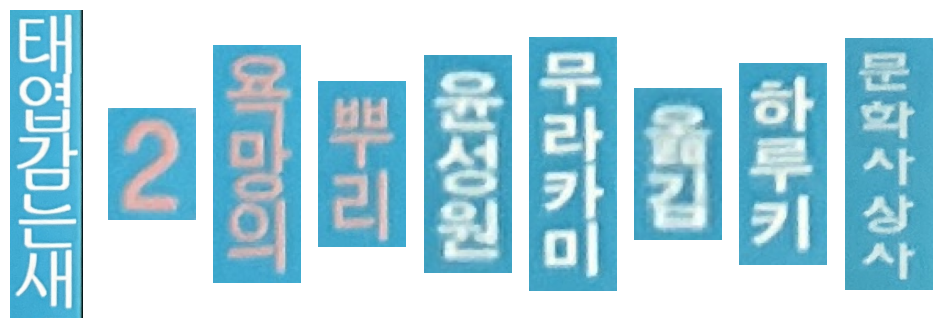

In [31]:
show_images(temp[0])

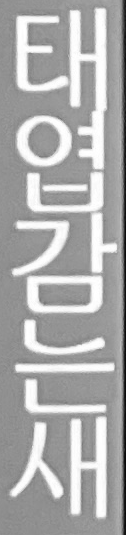

In [32]:
temp[0][0].convert('L')

In [20]:
np.mean(np_img)

NameError: name 'np_img' is not defined

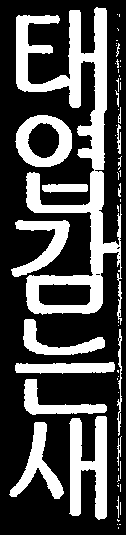

In [34]:
threshold = 170

# 이진화 함수
binary_img = temp[0][0].convert('L').point(lambda x: 0 if x < threshold else 255, '1')
binary_img

In [35]:
# 이미지 밝기 값들의 평균과 표준편차 계산
mean_brightness = np.mean(np_img)
std_brightness = np.std(np_img)

# 표준정규화 (Z-score normalization)
normalized_img = (np_img - mean_brightness) / std_brightness

# 정규화된 결과를 다시 이미지로 변환 (시각화를 위해 값 조정)
normalized_img_scaled = 255 * (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min())
normalized_img_scaled = normalized_img_scaled.astype(np.uint8)

# PIL 이미지로 변환 후 저장
normalized_image = Image.fromarray(normalized_img_scaled)

In [36]:
np.mean(normalized_image)

np.float64(132.65534371643395)

In [37]:
# 밝기 값 중에서 가장 많이 존재하는 값 찾기
histogram = np.bincount(np_img.flatten(), minlength=256)  # 0~255의 값에 대한 빈도 계산
most_frequent_brightness = np.argmax(histogram)  # 가장 많이 등장한 값
most_frequent_brightness

np.int64(1)

In [38]:
np.median(np_img)

np.float64(150.0)

In [39]:
np.min(np_img), np.max(np_img)

(np.uint8(0), np.uint8(221))

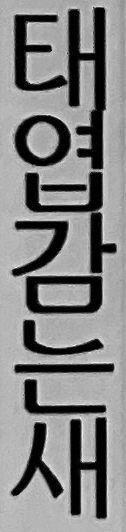

In [40]:
normalized_image

In [41]:
# 이미지의 히스토그램 표시
plt.hist(np.array(tb_list[0][1]).ravel(), bins=256, range=(0, 256), density=True)
plt.title('Pixel Intensity Histogram')
plt.show()

IndexError: list index out of range

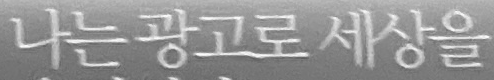

In [22]:
rt = tb_list[0][1].rotate(90, expand=True)
rt

In [23]:
tr.read_text(rt)

('나는광곤로제상을', 0.7658129334449768)

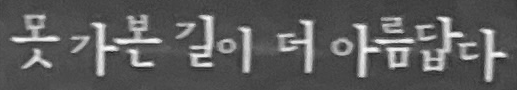

In [66]:
gray = rt.convert("L")
gray

In [67]:
tr.read_text(gray)

('틋거분길의허위분리', 0.6082932353019714)

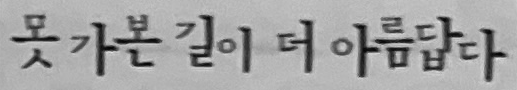

In [68]:
iv = ImageOps.invert(gray)
iv

In [69]:
tr.read_text(iv)

('못가본길이더아름다', 0.9664919972419739)

In [72]:
tr.read_text(binary_img)

('못가본길이더아름다', 0.9598489999771118)

In [49]:
def change_to_black_text(text_box, threshold = 128):
    text_box = text_box.convert("L")
    # 이미지의 평균 밝기 계산
    np_img = np.array(text_box)
    mean_brightness = np.mean(np_img)
    
    # 평균 밝기가 임계값보다 낮으면 (즉, 배경이 어두우면) 흑백 반전
    if mean_brightness < threshold:
        text_box = ImageOps.invert(text_box)
    return text_box

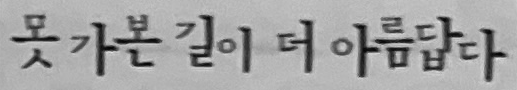

In [84]:
change_to_black_text(rt, threshold=128)